In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline

In [2]:
if 0:
    r_3d,m1,m2,x,y,z=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32), unpack=True)
else:
    r_3d,m1,m2,x,y,z=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH1.dat', usecols=(1,9,10,30,31,32), unpack=True)
    
r_3d0=r_3d[0]
m10=m1[0]
m20=m2[0]
x0=x[0]
y0=y[0]
z0=z[0]

r_3d=r_3d[1:]
m1=m1[1:]
m2=m2[1:]
x=x[1:]
y=y[1:]
z=z[1:]

In [3]:
def sersic(r, k, n, i0):
    I = i0*np.exp(-(r/k)**(1/n))
    return I

In [4]:
mges=m1+m2
r0=0.05
step=19
end=100
stepsize=((np.log10(end)-np.log10(r0))/step)
R=np.zeros(step)

r=np.logspace(np.log10(r0),np.log10(end),step+1)
r_i=r[:-1:]
r_a=r[1::]
binwidth=r_a-r_i


In [5]:
r3d,rho=np.loadtxt('densityfile_IMBH1.txt')
print(r3d,rho)
r_error=binwidth
rho_relerror=-2*r_error/r3d
rho_error=rho_relerror*rho

[  3.48752813e-02   7.38514878e-02   1.14725366e-01   1.74481001e-01
   2.62037803e-01   3.97926214e-01   6.04987288e-01   9.14058004e-01
   1.37870105e+00   2.07756424e+00   3.12815812e+00   4.70123602e+00
   7.06199999e+00   1.06001663e+01   1.59513438e+01   2.39492519e+01
   3.28609624e+01   5.29417404e+01   8.45067271e+01] [  2.67420654e+05   7.74898415e+04   4.25643517e+04   2.49825509e+04
   1.47114208e+04   8.84876642e+03   5.30012422e+03   3.21689789e+03
   1.74209093e+03   7.99280322e+02   3.03847524e+02   9.48529822e+01
   2.41859487e+01   4.98762548e+00   8.55825907e-01   1.26442386e-01
   5.83225404e-03   2.92067773e-05   2.63463432e-06]


/home/sophia/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: overflow encountered in exp
/home/sophia/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: overflow encountered in power
/home/sophia/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: overflow encountered in multiply


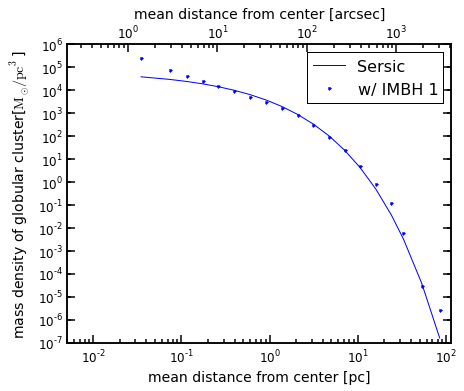

In [6]:
#defining fit function
def func(x,a,b,c):
    return a * np.exp((-b) * (x**c)) 

def func1(x,a,b,c):
    return a * np.exp(-b*x)*x**c

def Plummer(x,a,m):
    return (3*m)/(4*np.pi*(a**3))*(1+(x**2/a**2))**(-5/2)

def isochrones(x,a,b,m):
    return m*((3*(b+a)*(a**2)-(x**2)*(b+3*a))/(4*np.pi*((b+a)**3)*(a**3)))

#trying to optimize functions for given values R_final and Rho_final, know initial values from above
popt,pcov=curve_fit(func,r3d,rho,p0=[12000, 0.5, 0.5],sigma=rho_error[0:])
popt1,pcov1=curve_fit(func1,r3d,rho,sigma=rho_error[0:])
poptP,pcovP=curve_fit(Plummer,r3d,rho,sigma=rho_error[0:])
poptI,pcovI=curve_fit(isochrones,r3d,rho,sigma=rho_error[0:])
poptS, pcovS = curve_fit(sersic, r3d, rho, sigma = rho_error[0:])

#plotting
fig = plt.figure(figsize=(6.5,5.5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


#ax1.loglog(r3d,func(r3d,*popt),c='r',label='function:\n$f(x)='+'{:.2f}'.format(round(popt[0],1))
           #+'\cdot e^{-'+'{:.2f}'.format(round(popt[1],4))+'\cdot x^{'+'{:.2f}'.format(round(popt[2],4))+'}}$') 
#ax1.loglog(r3d,func1(r3d,*popt1),c='g',label='function:\n$f(x)='+'{:.2f}'.format(round(popt1[0],4))
           #+'\cdot e^{-'+'{:.2f}'.format(round(popt1[1],4))+'\cdot x}\cdot x^{'+'{:.2f}'.format(round(popt1[2],4))+'}$')
#ax1.loglog(r3d,Plummer(r3d,*poptP),c='k',label='Plummer model')
ax1.loglog(r3d, sersic(r3d, *poptS), c = 'pink', label = 'Sersic')
#ax1.loglog(r3d,isochrones(r3d,*poptI),label='isochrones')
ax1.loglog(r3d,rho,'b.',label='w/ IMBH 1')
ax1.set_xlim(0.005,115)
ax1.set_xlabel('mean distance from center [pc]', fontsize=14)
ax1.set_ylabel('mass density of globular cluster[$\mathrm{M_\odot/pc}^3$]', fontsize=14)
#ax1.grid(True)
ax1.legend(loc=0,prop={'size':16},numpoints=1)

ax2.set_xlim((0.005/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi)) #calculates x limits from parsec to arcsec
ax2.set_xscale('log')
ax2.set_xlabel('mean distance from center [arcsec]', fontsize=14)

ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

ax2.spines['top'].set_linewidth(1.5)
ax2.spines['right'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)
ax2.spines['left'].set_linewidth(1.5)

ax1.tick_params(length=8,width=1.5,labelsize=12)
ax1.tick_params(which='minor',length=4,width=1.5)
ax2.tick_params(length=8,width=1.5,labelsize=12)
ax2.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()
#fig.savefig('../Bachelorarbeit-Entwurf/Plots/density_prof_analytic.pdf',format='pdf',bbox_inches='tight')

In [7]:
print(popt)
print(popt1)
print(poptP)

[  6.96674673e+04   3.05241554e+00   4.89531097e-01]
[  2.41469371e+03   2.41182919e-01  -1.40914510e+00]
[  9.52347930e-01   6.21906235e+04]


In [8]:
mges=np.sum(m1[1:]+m2[1:])

In [9]:
r_a-r_i

array([  2.45947779e-02,   3.66928399e-02,   5.47418848e-02,
         8.16691748e-02,   1.21841879e-01,   1.81775358e-01,
         2.71189849e-01,   4.04586932e-01,   6.03601446e-01,
         9.00510316e-01,   1.34346734e+00,   2.00431296e+00,
         2.99022560e+00,   4.46110428e+00,   6.65550167e+00,
         9.92931337e+00,   1.48134985e+01,   2.21001926e+01,
         3.29711792e+01])

In [10]:
poptP[1]

62190.623505586154

In [11]:
mges

298430.08272924006